<a href="https://colab.research.google.com/github/itsCheithanya/Aventus/blob/main/aventus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/aventus/Hackathon_Data - Anonymised- v2.xlsx')

In [3]:
print(df.columns)
df = df.drop(0)

# Save the modified DataFrame to a new file
df.to_csv('modified_dataset.csv', index=False) 


Index(['Unique ID', 'Age', 'Gender', 'BCLOT', 'A/G RAT', 'DBIL', 'IBIL',
       'TBIL', 'TGLO', 'TREP', 'ALB', 'GGT', 'SGOT', 'SGPT', 'ALKPO4'],
      dtype='object')


In [4]:
from pandas.io.parsers.readers import read_csv
df=read_csv('modified_dataset.csv')

In [5]:
df.drop(axis=1,columns={'Unique ID', 'Age', 'Gender','TGLO','ALB','DBIL', 'IBIL'},inplace=True)

In [6]:
import numpy as np

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from sklearn.neighbors import NearestNeighbors
features = ['BCLOT', 'A/G RAT',
       'TBIL', 'TREP', 'GGT', 'SGOT', 'SGPT', 'ALKPO4']

# Perform feature scaling
scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(df[features]))
scaled_features.columns=features

In [8]:
from sklearn.cluster import DBSCAN

In [9]:

model = DBSCAN(eps = 0.5, min_samples = 16)
cluster_labels = model.fit_predict(scaled_features)

Cluster -1 - Size: 45968
Cluster 0 - Size: 285547
Cluster 1 - Size: 29
Cluster 2 - Size: 22


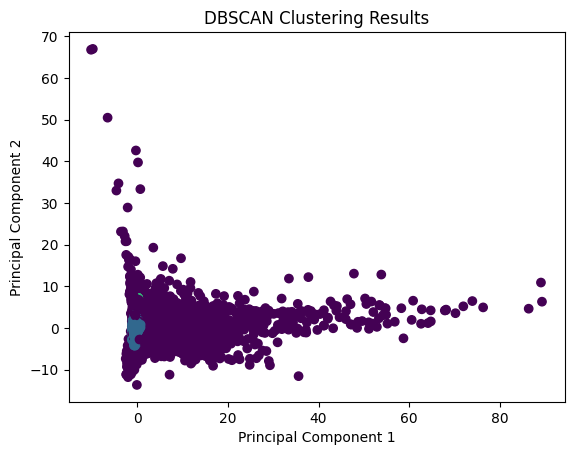

In [10]:
df['Cluster'] = cluster_labels
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    cluster_size = len(cluster_data)
    
    print(f"Cluster {cluster} - Size: {cluster_size}")
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Create a scatter plot of the clusters
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels+2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering Results')
plt.show()

In [13]:
df.head(5)

,BCLOT,A/G RAT,TBIL,TREP,GGT,SGOT,SGPT,ALKPO4,Cluster
0,358.0,1.15,1.20,7.3,25.0,26.0,32.0,58.0,0
1,172.0,1.85,1.10,6.9,20.0,27.0,30.0,61.0,0
2,166.0,1.48,0.31,7.0,16.0,28.0,36.0,97.0,0
3,213.0,1.26,0.60,7.9,16.0,20.0,28.0,89.0,0
4,187.0,1.24,0.28,7.8,39.0,20.0,18.0,105.0,0


In [14]:
df.tail(5)

,BCLOT,A/G RAT,TBIL,TREP,GGT,SGOT,SGPT,ALKPO4,Cluster
331561,142.0,1.62,0.53,6.8,20.0,21.0,22.0,69.0,0
331562,166.0,1.36,0.34,9.2,164.0,37.0,39.0,123.0,-1
331563,219.0,1.41,0.34,7.1,25.0,40.0,60.0,65.0,0
331564,148.0,2.63,0.62,6.1,55.0,27.0,24.0,45.0,-1
331565,186.0,1.79,0.32,6.7,25.0,27.0,22.0,53.0,0


In [20]:
# Calculate the mean of each cluster
cluster_means = []
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    cluster_mean = np.median(cluster_data, axis=0)
    cluster_means.append(cluster_mean)

# Print the cluster means
for i, cluster_mean in enumerate(cluster_means):
    print(f"Cluster {i} Median: {cluster_mean}")

Cluster 0 Median: [172.1    1.45   0.8    7.    59.    40.8   43.   113.    -1.  ]
Cluster 1 Median: [180.     1.6    0.59   7.17  21.    22.2   24.    81.     0.  ]
Cluster 2 Median: [0. 0. 0. 0. 0. 0. 0. 0. 1.]
Cluster 3 Median: [161.      1.82    0.455   7.2    13.     24.     18.    357.      2.   ]
Cluster 0 Median: [172.1    1.45   0.8    7.    59.    40.8   43.   113.    -1.  ]
Cluster 1 Median: [180.     1.6    0.59   7.17  21.    22.2   24.    81.     0.  ]
Cluster 2 Median: [0. 0. 0. 0. 0. 0. 0. 0. 1.]
Cluster 3 Median: [161.      1.82    0.455   7.2    13.     24.     18.    357.      2.   ]


In [18]:
# Calculate the mean of each cluster
cluster_means = []
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    cluster_mean = np.mean(cluster_data, axis=0)
    cluster_means.append(cluster_mean)

# Print the cluster means
for i, cluster_mean in enumerate(cluster_means):
    print(f"Cluster {i} Mean: {cluster_mean}")

Cluster 0 Mean: BCLOT      194.119375
A/G RAT      1.518227
TBIL         1.479713
TREP         6.909638
GGT        107.121601
SGOT        77.018525
SGPT        75.161105
ALKPO4     145.346793
Cluster     -1.000000
dtype: float64
Cluster 1 Mean: BCLOT      187.985521
A/G RAT      1.617962
TBIL         0.664446
TREP         7.156114
GGT         25.083675
SGOT        24.173872
SGPT        27.640810
ALKPO4      84.739925
Cluster      0.000000
dtype: float64
Cluster 2 Mean: BCLOT      0.0
A/G RAT    0.0
TBIL       0.0
TREP       0.0
GGT        0.0
SGOT       0.0
SGPT       0.0
ALKPO4     0.0
Cluster    1.0
dtype: float64
Cluster 3 Mean: BCLOT      160.472727
A/G RAT      1.827727
TBIL         0.475455
TREP         7.209545
GGT         14.309091
SGOT        25.886364
SGPT        18.004545
ALKPO4     356.804545
Cluster      2.000000
dtype: float64
